### Homework 7
#### ELEC-E8740 - Basics of sensor fusion Autumn'21
- Name: Hoang Nguyen Khac
- Student number: 533263

The equation in canonical form is
$$
\frac{d}{dt} \underbrace{\begin{bmatrix}
  p^x \\ p^y \\ \varphi
\end{bmatrix}}_{\mathbf{x}}
= \begin{bmatrix}
  v \, \cos(\varphi) \\ v \, \sin(\varphi) \\ \omega_{gyro}
\end{bmatrix}
$$
which is
$$
  \dot{\mathbf{x}} = \mathbf{f}(\mathbf{x},\mathbf{u}) 
$$
where
$$
\mathbf{x} = \begin{bmatrix}
  p^x \\ p^y \\ \varphi
\end{bmatrix}, \qquad \mathbf{u} = \begin{bmatrix}
  v \\ \omega_{gyro}
\end{bmatrix} \\
\mathbf{f}(\mathbf{x},\mathbf{u})
= \begin{bmatrix}
  u_1 \, \cos(x_3) \\ u_1 \, \sin(x_3) \\ u_2
\end{bmatrix}
$$


### a) Assume that the robot starts at time t = 0 from origin, heading upwards, that is, towards the positive y values. What should be the initial conditions px(0), py(0), ϕ(0) corresponding to this?
- To place the robot at the origin then px(0), py(0) should be [0,0]
- To make it head upwards, towards the positive y values, the angle ϕ(0) must be $\pi/2$

### b) Construct speed and gyroscope signals which correspond to the following movement:
-  The speed is constant v(t) = 2 for the time interval t ∈ [0, 10] and zero otherwise.
- The orientation of the robot is upwards (and thus it moves up) in all time moments except during t ∈ [3, 7) when it does a 360 degree turn clockwise.

In [252]:
%matplotlib inline
import numpy as np
import scipy.linalg as linalg
import scipy.integrate as integrate
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [253]:
def fr(x,u):
    return np.array([u[0] * np.cos(x[2]), u[0] * np.sin(x[2]), u[1]])

In [254]:
x0 = np.array([0,0,math.pi/2])
dt = 0.1
tr = np.arange(0,15+dt,dt)

Text(0.5, 1.0, 'Speed')

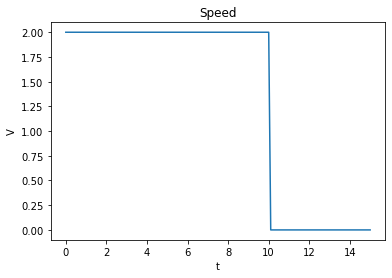

In [255]:
V = np.zeros((tr.shape[0],))
Omega = np.zeros((tr.shape[0],))
for k in range(tr.shape[0]):
    if tr[k] <= 10:
        V[k] = 2
    else:
        V[k] = 0
        
    if tr[k] < 7 and tr[k] >= 3:
        Omega[k] = -math.pi/2
    else:
        Omega[k] = 0

plt.clf()
plt.plot(tr,V)
plt.xlabel('t')
plt.ylabel('V')
plt.title('Speed')

Text(0.5, 1.0, 'Omega')

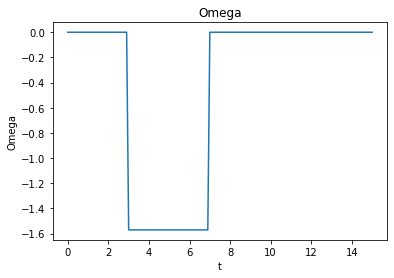

In [256]:
plt.plot(tr,Omega)
plt.xlabel('t')
plt.ylabel('Omega')
plt.title('Omega')

### c) Numerically, using Euler method, solve the diﬀerential equations with the inputs that you constructed above. Visualize the solution and check that it is what you expected.

Text(0.5, 1.0, 'Position')

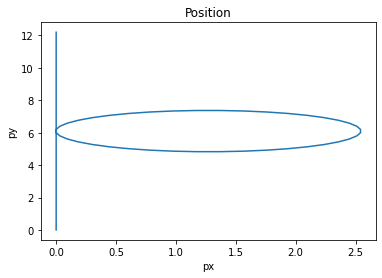

In [265]:
xr = np.zeros((tr.shape[0],3))
cx = x0
for k in range(1,tr.shape[0]):
    u  = np.array([V[k-1],Omega[k-1]])
    dt = tr[k] - tr[k-1]
    cx = cx + dt * fr(cx,u);    
    xr[k,:] = cx;
       
plt.clf()
plt.plot(xr[:,0],xr[:,1])
plt.xlabel('px')
plt.ylabel('py')
plt.title('Position')


Text(0.5, 1.0, 'Position by px')

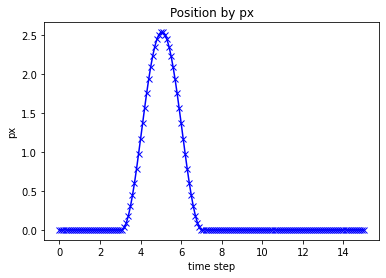

In [259]:
plt.plot(tr,xr[:,0],'bx-')
plt.xlabel('time step')
plt.ylabel('px')
plt.title('Position by px')

Text(0.5, 1.0, 'Position by py')

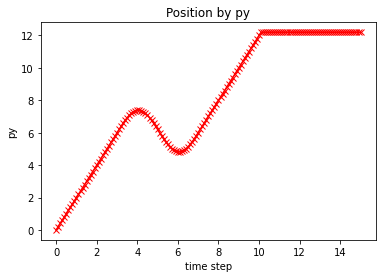

In [260]:
plt.plot(tr,xr[:,1],'rx-')
plt.xlabel('time step')
plt.ylabel('py')
plt.title('Position by py')

Text(0.5, 1.0, 'Orientation')

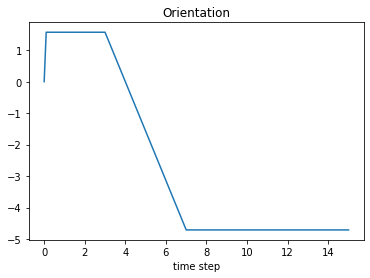

In [261]:
plt.clf()
plt.plot(tr,xr[:,2])
plt.xlabel('time step')
plt.title('Orientation')

- The robot is supposed to move up towards positive y values and then from t $\in$ [3,7) it takes a 360-degree turn clockwise. 
- According to the px-py figure, it moves exactly like that. And to make sure, 2 figures of px and py by time t are plotted alongside.
- As can be seen from the px plot, px is remained 0 from beginning until increasing from t = 3, where the robot turns clockwise (x > 0). After that px decreases again as the robot completes the 360-degree turn. After t = 7, px remains 0 as the robot continues to move upwards.
- Also from py plot, py increases proportionally with time t from the beginning as the robot moves upwards, and then when it first takes a turn clockwise, py decreases and then increases again when the robot completes the turn. After t = 10, speed is 0 hence py remains constant. 